## Graficos Trifásicos

> Bibliografía Python / Jupyter:
- https://codesolid.com/creating-a-python-interactive-plot/
- https://www.markdownguide.org/basic-syntax/
 

In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import math 
from ipywidgets import *
from math import pi

C:\Users\Laptop\AppData\Local\Temp\ipykernel_12088\3779309340.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


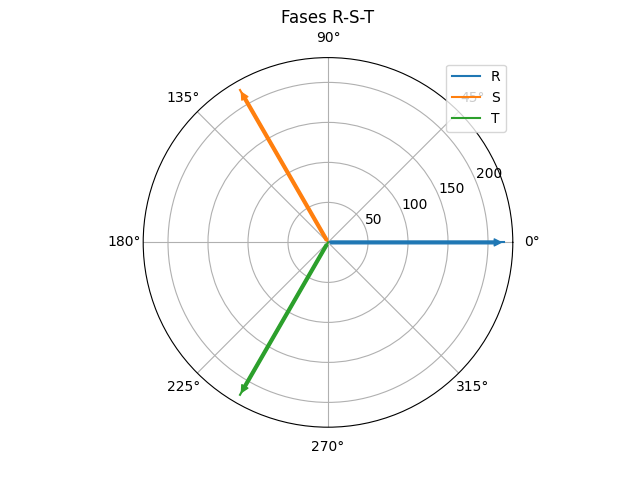

In [2]:
# Genera graficos fasoriales y temporales RST
# [[Angulo punto de inicio, Angulo punto final], [Radio punto de inicio, Radio punto final]]

FasorR = [np.deg2rad([0, 0]),[0,220]]
FasorS = [np.deg2rad([0, 120]),[0,220]]
FasorT = [np.deg2rad([0, 240]),[0,220]]

def dibuja_vector(vector, label):    
    line = plt.plot(vector[0],vector[1], label=label)[0]
  
    line.axes.annotate('',          #Dibuja Flechas
        xytext=(0, 0),
        xy=(vector[0][1], vector[1][1]),       
        arrowprops=dict(color=line.get_color(), arrowstyle="simple"),
        size=10
    )

def configure_graph_grid():
    # """Set up a square grid axis"""
   
    # # Size
    # grid_min = -6
    # grid_max = 6
    
    # plt.axis('square')
    # plt.axis(( grid_min, grid_max, grid_min, grid_max))
    
    # # Plot x and y axes
    # plt.plot([grid_min, grid_max], [0,0], 'g')
    # plt.plot([0,0],[grid_min, grid_max], 'g')
    ax = plt.grid()
    ax = plt.subplot(111, polar=True)

# Display the grid and the vectors
graf_1 = plt.figure()

configure_graph_grid()
line_1 = dibuja_vector(FasorR, "R")
line_2 = dibuja_vector(FasorS, "S")
line_2 = dibuja_vector(FasorT, "T")

deg = np.linspace(0, 3 * np.pi, 400)
FaseR = np.sin(deg)
ax = plt.legend()
ax = plt.title("Fases R-S-T")
ax = plt.show()




In [3]:
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets

def do_update(v1, v2):
    """Based on the new control state, update the interactive plot.
    
       The approach here is to clear and redraw the whole plot rather than simply to update 
       the lines. Simply setting new x and y data for the lines works in the line case, but 
       doesn't because we're drawing them as arrows.
       
    """
    figure.clf()
    configure_graph_grid()
    line_1 = dibuja_vector(v1, get_label("Vector 1", v1))
    line_2 = dibuja_vector(v2, get_label("Vector 2", v2))
    
    plt.legend()
    plt.title(get_title(v1, v2))
    plt.draw()
    plt.legend()
    
def handle_event(v1_x, v1_y, v2_x, v2_y):
    """Process events from the ipywidgets.interactive handler.
       
       Argument names in the event handler must match the keys in the "interactive" call (below).       
    """
    
    # Repack the x and y coordinates into two vectors, and call do_update to process the change.
    vector1 = [v1_x, v1_y]
    vector2 = [v2_x, v2_y]
 
    do_update(vector1, vector2)    
    

def slider_config(value):
    """Return an IntSlider widget with the common configuration"""
    return widgets.IntSlider(min=-6, max=6, step=1, value=value)


# Make the slider controls interactive, and display them
slider_controls = interactive(handle_event, 
                 v1_x=slider_config(vector_1[0]), 
                 v1_y=slider_config(vector_1[1]),
                 v2_x=slider_config(vector_2[0]), 
                 v2_y=slider_config(vector_2[1]))
display(slider_controls)

# Display the grid and the vectors
figure = plt.figure()
configure_graph_grid()
line_1 = dibuja_vector(vector_1, get_label("Vector 1", vector_1))
line_2 = dibuja_vector(vector_2, get_label("Vector 2", vector_2))
plt.legend()
plt.title(get_title(vector_1, vector_2))
plt.show()

NameError: name 'vector_1' is not defined